In [1]:
import tensorflow as tf

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

2022-02-14 09:17:02.874920: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
        print(e)

# LSTM

In [4]:
from tensorflow.keras.datasets import imdb

In [5]:
max_features = 10000
maxlen = 500
batch_size = 32
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [6]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    metrics = ['acc'],
    optimizer = 'rmsprop')

In [9]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

2022-02-14 10:02:40.218849: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-14 10:02:40.235612: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


Epoch 1/10


2022-02-14 10:02:41.525259: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-02-14 10:02:42.164513: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-02-14 10:02:42.199861: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


157/157 [==============================] - 10s 26ms/step - loss: 0.6036 - acc: 0.6675 - val_loss: 0.3678 - val_acc: 0.8498
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2972 - acc: 0.8867 - val_loss: 0.2762 - val_acc: 0.8892
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2373 - acc: 0.9076 - val_loss: 0.2818 - val_acc: 0.8900
Epoch 4/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1939 - acc: 0.9302 - val_loss: 0.4640 - val_acc: 0.8038
Epoch 5/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1781 - acc: 0.9352 - val_loss: 0.3704 - val_acc: 0.8830
Epoch 6/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1742 - acc: 0.9422 - val_loss: 0.2946 - val_acc: 0.8822
Epoch 7/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1435 - acc: 0.9512 - val_loss: 0.4552 - val_acc: 0.8374
Epoch 8/10
157/157 [==============================] - 5s 33ms/step - loss: 0.12

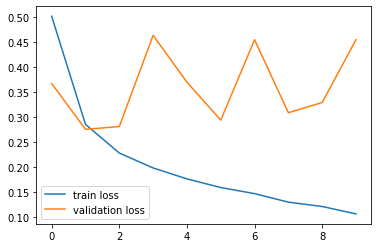

In [10]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

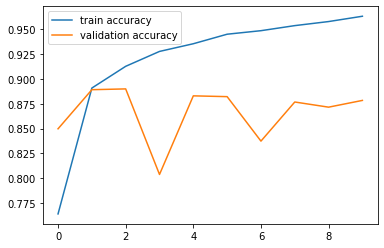

In [11]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# 컨브넷

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 128, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(32, 7, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(5))
model.add(tf.keras.layers.Conv1D(32, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add( tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    metrics = ['acc'],
    optimizer = tf.keras.optimizers.RMSprop(lr=0.0001))

In [16]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 30ms/step - loss: 0.6928 - acc: 0.5154 - val_loss: 0.6907 - val_acc: 0.5770
Epoch 2/10
157/157 [==============================] - 5s 29ms/step - loss: 0.6860 - acc: 0.7194 - val_loss: 0.6843 - val_acc: 0.6750
Epoch 3/10
157/157 [==============================] - 5s 29ms/step - loss: 0.6741 - acc: 0.7775 - val_loss: 0.6594 - val_acc: 0.7454
Epoch 4/10
157/157 [==============================] - 5s 33ms/step - loss: 0.6369 - acc: 0.7899 - val_loss: 0.5745 - val_acc: 0.7980
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 0.5344 - acc: 0.8186 - val_loss: 0.4521 - val_acc: 0.8270
Epoch 6/10
157/157 [==============================] - 6s 36ms/step - loss: 0.4083 - acc: 0.8499 - val_loss: 0.3753 - val_acc: 0.8446
Epoch 7/10
157/157 [==============================] - 6s 36ms/step - loss: 0.3323 - acc: 0.8732 - val_loss: 0.3433 - val_acc: 0.8494
Epoch 8/10
157/157 [==============================] - 6s 36ms/step - 

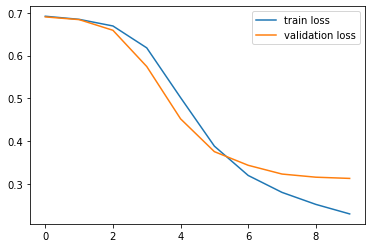

In [17]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

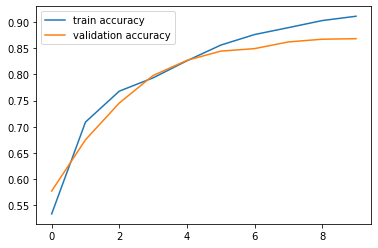

In [18]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# SVC(Support Vector Classification)

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC

In [20]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 KB 11.5 MB/s eta 0:00:00


In [23]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.8/564.8 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 59.5 MB/s eta 0:00:0000:0100:01


In [24]:
import shap
import eli5
from eli5.sklearn import PermutationImportance

In [28]:
def contours2D(model, x1, x2, h=0.01, **params):
  xx1, xx2 = np.meshgrid(
    np.arange(x1.min() - 0.1, x1.max() + 0.1, h), 
    np.arange(x2.min() - 0.1 , x2.max() + 0.1 , h)
  )

  y = model.predict(np.c_[xx1.flatten(), xx2.flatten()])
  y = y.reshape(xx1.shape)
  result = plt.contourf(xx1, xx2, y, **params)
  return result

## SVM - linear

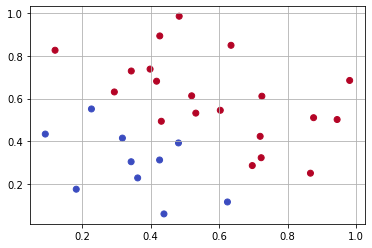

In [25]:
np.random.seed(123)
x = np.random.rand(30,2)
y = np.zeros(len(x))
y[-4/5 + 3/4 * x[:,0] + 1 * x[:,1] > 0] = 1

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

In [26]:
model = LogisticRegression(penalty='none').fit(x, y)

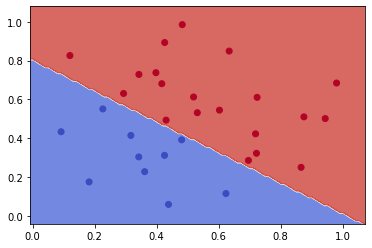

In [29]:
x1, x2 = x[:,0], x[:, 1]
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

### 파라미터 C에 따른 경계선의 변화
- C는 결정경계를 정하는 파라미터 이고,
  - 마진 내의 오분류를 어느정도 허용할지에 대한 파라미터
  - C가 너무 작으면 오분류를 허용할 가능성이 놓고, 과소적합될 우려가 있습니다. 
  - C가 너무 크면, 오분류를 허용하지 않겠다는 뜻이고, 과적합될 가능성이 높습니다.
  - 적절한 C를 찾아야 합니다.

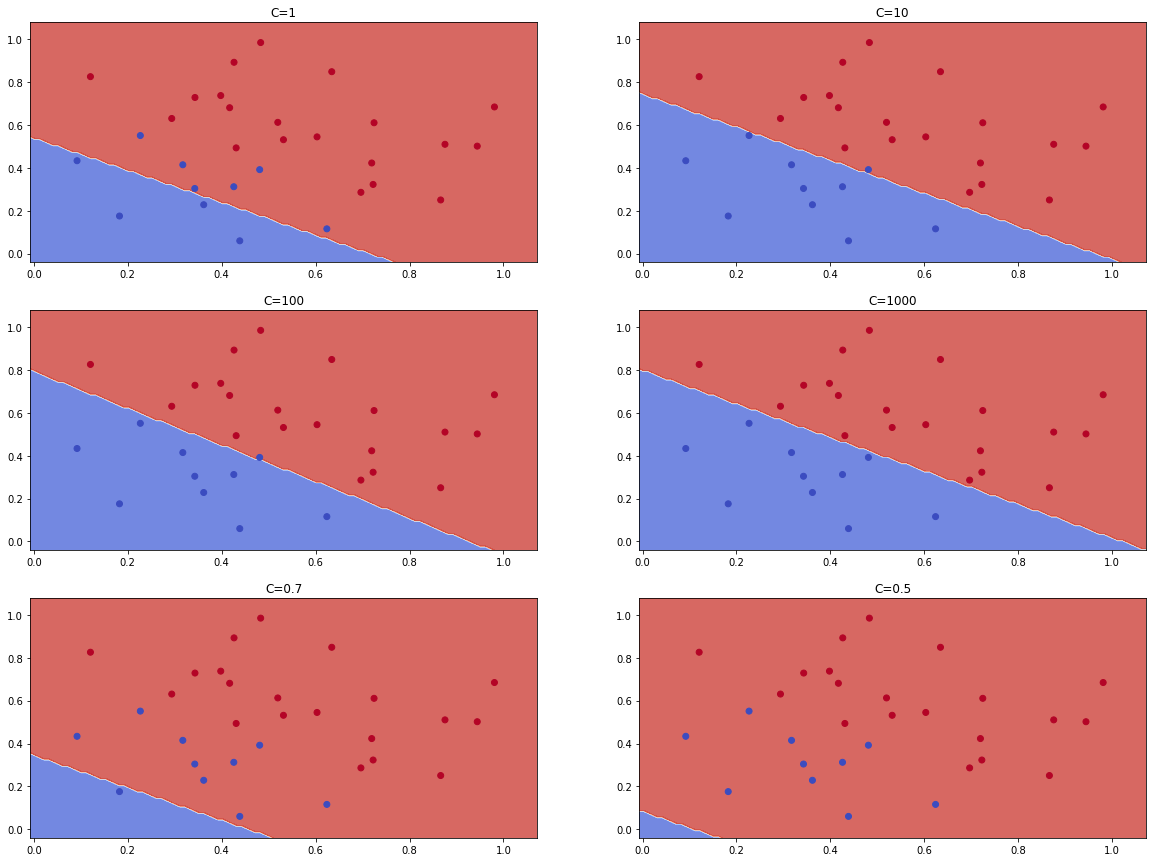

In [31]:
plt.figure( figsize=(20, 15) )

plt.subplot(3, 2, 1)
model = SVC(kernel='linear', C=1).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=1')

plt.subplot(3, 2, 2)
model = SVC(kernel='linear', C=10).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=10')

plt.subplot(3, 2, 3)
model = SVC(kernel='linear', C=100).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=100')

plt.subplot(3, 2, 4)
model = SVC(kernel='linear', C=1000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=1000')

plt.subplot(3, 2, 5)
model = SVC(kernel='linear', C=0.7).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=0.7')

plt.subplot(3, 2, 6)
model = SVC(kernel='linear', C=0.5).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=0.5')

plt.show()

## SVM - Poly
- 일반적인 선형회귀에선는 차수를 늘려서 비선형 모형을 적합을 하게 되는데
- SVM은 어떠한 커널을 적용하느냐에 따라서 달라질 수 있습니다.

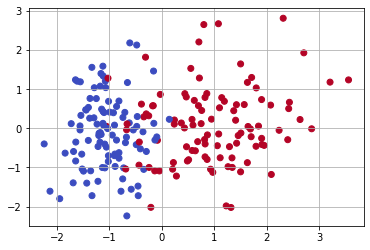

In [34]:
x, y = datasets.make_classification(
  n_samples=200, n_features=2, n_classes=2, random_state=20220214,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
)

x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

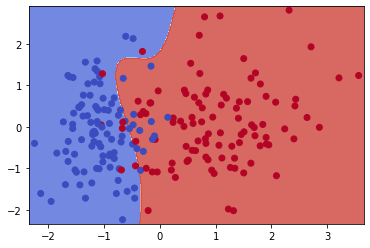

In [35]:
model = SVC(kernel='poly', C=1000000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

## SVM - Gaussian Kernel
- 비선형 모형을 찾기 위해서 저차원의 자료를 고차원을 변경
  - 샘플 예제에서는 2차원의 자료를 3차원으로 변환
  - 이 방법이 성능이 매우 뛰어납니다.

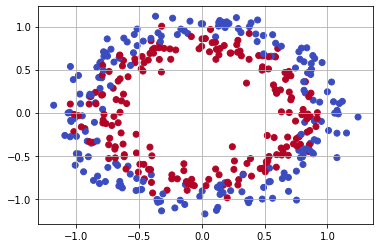

In [36]:
x, y = datasets.make_circles(n_samples=400, noise=0.1, random_state=410)
x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

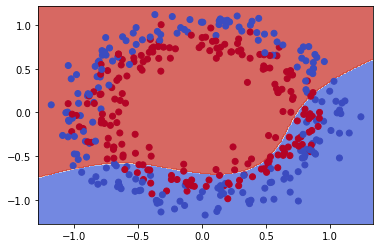

In [42]:
model = SVC(kernel='poly', C=10000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

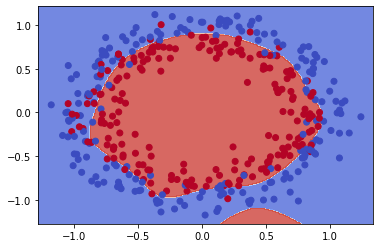

In [44]:
model = SVC(kernel='rbf', C=100000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

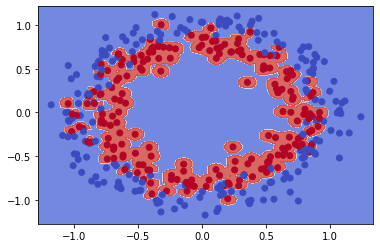

In [46]:
model = SVC(kernel='rbf', C=10, gamma=1000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

- 감마는 곡률경계를 결정하는 파라미터
 - 감마가 작으면 곡률의 범위가 커지고 과소적합 우려
 - 감마가 크면 곡률의 범위가 작아지고 자료를 과적합 발생 가능

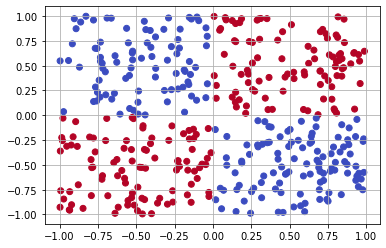

In [73]:
np.random.seed(410)
x = np.random.uniform(-1,1, (400,2))
y = np.zeros((400), dtype=np.int32)
y[ x[:,0] * x[:,1] > 0] = 1

x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.show()

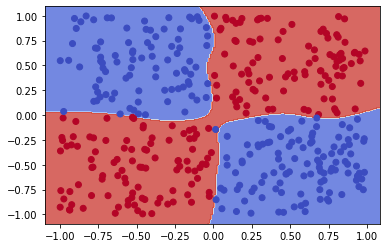

In [74]:
model = SVC(kernel='rbf', C=10, gamma=10).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

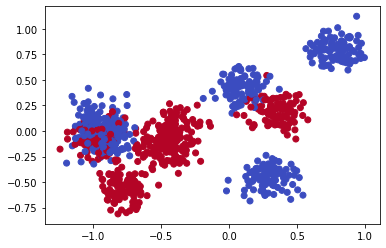

In [75]:
x, y = datasets.make_blobs( 
  n_samples=1000, center_box=(-1, 1), centers=10, cluster_std=0.1, random_state=3)
y %= 2

x1, x2 = x[:, 0], x[:, 1]
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.show()

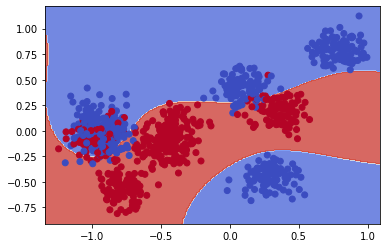

In [76]:
model = SVC(kernel='rbf', C=10, gamma=1).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

## kaggle(Don't Overfit)

In [47]:
!pwd

/home/lab11


In [51]:
kaggle_json_path = '/home/lab11/kaggle.json'

! mkdir -p ~/.kaggle
! cp '{kaggle_json_path}' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [53]:
! mkdir ./data/dont_overfit

In [55]:
%cd '/home/lab11/data/dont_overfit/'

/home/lab11/data/dont_overfit


In [56]:
! pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 20.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=d49c6457ef7c16a7d0e7a9e389452f2c3b90cb097bde12cd8a31046f8a585ced
  Stored in directory: /home/lab11/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [57]:
! kaggle competitions download -c dont-overfit-ii

  0%|                                               | 0.00/12.7M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 12.7M/12.7M [00:00<00:00, 246MB/s]


In [61]:
!ls

dont-overfit-ii.zip  sample_submission.csv  test.csv  train.csv


In [59]:
! unzip dont-overfit-ii.zip

Archive:  dont-overfit-ii.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [62]:
train = pd.read_csv('/home/lab11/data/dont_overfit/train.csv')
train.head(2)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343


- 자료의 개수보다 변수의 개수가 더 많은 자료
  - 일부러 과적합을 발생시키려는 의도로 만들어진 자료
- 변수 이름이 없고, 데이터도 표준화된 자료
  - 자료에 개인정보가 포함되어 있거나, 자료를 외부에 노출하고 싶지 않은 경우
  - 변수에 대한 배경지식 없이 오직 수치적인 값(통계량)만 보고 모형을 만들어야 합니다.

In [63]:
from sklearn.model_selection import train_test_split

In [79]:
features = train.loc[:, '0':'299']
target = train['target']

x_train, x_val, y_train, y_val = train_test_split(features, target, train_size=0.8, shuffle=True)

In [80]:
print(f'train size: {x_train.shape}, test_size: {x_val.shape}')

train size: (200, 300), test_size: (50, 300)


### Base Model
- 모형을 만드는데 있어서 기준점이 되는 모델을 작성
  - 이 이후에 모형은 base model을 기준으로 해서 더 놓은 수치를 달성할 수 있도록
  - base model이 없으면, 현재 나온 수치가 좋은 수치인지 아닌지 확인이 안되기 때문에, 기준되는 모델을 작성
  - 적어도 base model 보다는 더 좋은 모형을 찾는다 라고 생각하면 됩니다. 
- 가장 기본적인 알고리즘으로 생성
  - Linear Regression, Logistic Regression
  - 해석력이 좋기 때문에 다음에 어떤 작업을 해야 될지 조금 더 명확하게 확인할 수 있습니다.

In [81]:
model = LogisticRegression(penalty='none').fit(x_train, y_train)

In [82]:
eli5.show_weights(model, feature_names=x_train.columns.tolist())

Weight?,Feature
+3.030,127
+2.285,247
+1.836,18
+1.821,66
+1.726,32
+1.602,55
+1.567,93
+1.466,3
+1.463,169
+1.452,5


In [83]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

In [84]:
yhat = model.predict(x_train)
acc = accuracy_score(y_train, yhat)
f1 = f1_score(y_train, yhat)
roc = roc_auc_score(y_train, yhat)
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 1.0, f1: 1.0, roc: 1.0


In [85]:
yhat = model.predict(x_val)
acc = accuracy_score(y_val, yhat)
f1 = f1_score(y_val, yhat)
roc = roc_auc_score(y_val, yhat)
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.7, f1: 0.4444444444444445, roc: 0.6226611226611227


In [86]:
from sklearn.metrics import classification_report

In [87]:
yhat = model.predict(x_val)
print(classification_report(y_val, yhat))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79        37
         1.0       0.43      0.46      0.44        13

    accuracy                           0.70        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.71      0.70      0.70        50



In [88]:
np.unique( y_train,  return_counts=True )

(array([0., 1.]), array([146,  54]))

- 자료의 개수가 너무 적고
  - 그에 비해 변수의 개수는 너무 많습니다.(복잡도)
  - 클래스별 불균형 문제도 같이 존재

In [89]:
perm = PermutationImportance(model, random_state=123).fit(x_train, y_train)
eli5.show_weights(perm, feature_names=x_train.columns.tolist())

Weight,Feature
0 ± 0.0000,91
0 ± 0.0000,108
0 ± 0.0000,107
0 ± 0.0000,106
0 ± 0.0000,105
0 ± 0.0000,104
0 ± 0.0000,103
0 ± 0.0000,102
0 ± 0.0000,101
0 ± 0.0000,100


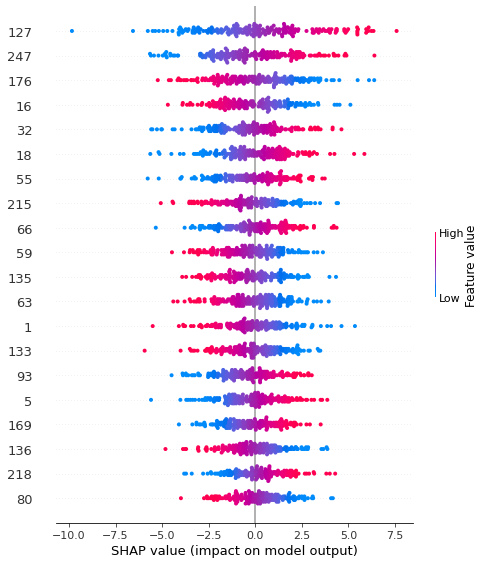

In [90]:
explainer = shap.LinearExplainer(model, x_train)
shap_value = explainer.shap_values(x_train)
shap.summary_plot(shap_value, x_train)

In [91]:
from sklearn.feature_selection import RFE
from sklearn import feature_selection

In [92]:
feature_selector = RFE(model, n_features_to_select=20)
feature_selector = feature_selector.fit(x_train, y_train)

In [93]:
x_train_selected = x_train.loc[:, feature_selector.support_]
x_train_selected.columns

Index(['1', '18', '32', '36', '47', '66', '70', '80', '93', '127', '135',
       '136', '144', '176', '189', '199', '235', '244', '258', '261'],
      dtype='object')

In [94]:
x_val_selected = x_val.loc[:, feature_selector.support_]
x_val_selected.columns

Index(['1', '18', '32', '36', '47', '66', '70', '80', '93', '127', '135',
       '136', '144', '176', '189', '199', '235', '244', '258', '261'],
      dtype='object')

동일한 모델로 이번에는 선택된 변수만 사용

In [95]:
model = LogisticRegression(penalty='none').fit(x_train_selected, y_train)

In [96]:
yhat = model.predict(x_train_selected)
acc = accuracy_score(y_train, yhat)
f1 = f1_score(y_train, yhat)
roc = roc_auc_score(y_train, yhat)
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.925, f1: 0.8623853211009175, roc: 0.9077879249112126


In [97]:
yhat = model.predict(x_val_selected)
acc = accuracy_score(y_val, yhat)
f1 = f1_score(y_val, yhat)
roc = roc_auc_score(y_val, yhat)
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.68, f1: 0.33333333333333337, roc: 0.5592515592515592


### SVC 적용

In [98]:
model = SVC(kernel='rbf', C=1, gamma=1).fit(x_train_selected, y_train)

In [99]:
yhat = model.predict(x_train_selected)
acc = accuracy_score(y_train, yhat)
f1 = f1_score(y_train, yhat)
roc = roc_auc_score(y_train, yhat)
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 1.0, f1: 1.0, roc: 1.0


In [100]:
yhat = model.predict(x_val_selected)
acc = accuracy_score(y_val, yhat)
f1 = f1_score(y_val, yhat)
roc = roc_auc_score(y_val, yhat)
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.74, f1: 0.0, roc: 0.5


#### 교차 검증(Cross Valistaion)

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
model = SVC(C=1, gamma=1)
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.725 0.725 0.725 0.725 0.75 ]
0.73


In [103]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

In [104]:
kfolds = KFold(n_splits = 5, shuffle=True)
model = SVC(C=1, gamma=1)
scores = cross_val_score(model, x_train, y_train, cv=kfolds, scoring='accuracy')
print(scores)
print(scores.mean())

[0.825 0.775 0.7   0.725 0.625]
0.73


StratifiedKFold를 이용하는 경우(분류모형에서만 사용이 가능)   
클래스별로 균형있게 셋을 만들어주는 특징이 있습니다.

In [105]:
kfolds = StratifiedKFold(n_splits = 5, shuffle=True)
model = SVC(C=1, gamma=1)
scores = cross_val_score(model, x_train, y_train, cv=kfolds, scoring='accuracy')
print(scores)
print(scores.mean())

[0.725 0.725 0.725 0.725 0.75 ]
0.73


RepeatedStrarifiedKFold
- 미리 분할하지 않고 내부적으로 그때그때 반복하면서 set을 생성
- 속도가 느리다는 단점

In [106]:
kfolds = RepeatedStratifiedKFold(n_splits = 5, n_repeats=5)
model = SVC(C=1, gamma=1)
scores = cross_val_score(model, x_train, y_train, cv=kfolds, scoring='accuracy')
print(scores)
print(scores.mean())

[0.725 0.725 0.725 0.725 0.75  0.725 0.725 0.725 0.725 0.75  0.725 0.725
 0.725 0.725 0.75  0.725 0.725 0.725 0.725 0.75  0.725 0.725 0.725 0.725
 0.75 ]
0.73


#### 파라미터 추정
- GridSearch
- Baysian Optimization
- ... 

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
params = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}


model = SVC( )
search = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=10)
results = search.fit(x_train_selected, y_train )

In [109]:
print(results.best_params_)
print(results.best_score_)

{'C': 10, 'gamma': 0.01}
0.9


In [110]:
best_model = results.best_estimator_
yhat = best_model.predict(x_val_selected)
acc = accuracy_score(y_val, yhat)
f1 = f1_score(y_val, yhat)
roc = roc_auc_score(y_val, yhat)
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.72, f1: 0.3636363636363637, roc: 0.5862785862785863


- 해당 자료는 비선형적인 관계가 거의 없는 자료
  - 일반화선형모형이 제일 잘 맞는 자료

### Logistic Regression
- penalty: Regularization(L1, L2, ElasticNet)
- C: Regularization의 강도(실수값)
- class_weight: 클래스 가중치
  - 클래스의 비율이 불균형인 경우 보정
  - 'balanced', 'none'
- solver: 최적화 알고리즘
  - 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
- multi_class: 다중분류
  - 이진분류 문제가 아닌 경우에는 해당 파라미터를 꼭 설정
- l1_ratio: ElasticNet을 사용하는 경우에만 사용

In [111]:
from sklearn.feature_selection import RFECV

In [112]:
kfolds = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)

model = LogisticRegression(class_weight='balanced', solver='liblinear')
feature_selector = RFECV( model, min_features_to_select=20, cv=kfolds)
feature_selector = feature_selector.fit(x_train, y_train)

In [113]:
x_train_selected = x_train.loc[:, feature_selector.support_]
x_train_selected.columns

Index(['16', '18', '36', '63', '66', '69', '76', '93', '126', '127', '133',
       '136', '140', '176', '199', '200', '210', '218', '235', '241'],
      dtype='object')

In [114]:
x_val_selected = x_val.loc[:, feature_selector.support_]
x_val_selected.columns

Index(['16', '18', '36', '63', '66', '69', '76', '93', '126', '127', '133',
       '136', '140', '176', '199', '200', '210', '218', '235', '241'],
      dtype='object')

In [115]:
kfolds = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)

params = {
  'penalty': ['l1', 'l2'],
  'C': [ 0.001, 0.01, 0.1, 1, 10, 100, 1000 ],
  'class_weight': ['balanced', None],
}

model = LogisticRegression(solver='liblinear')
search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=kfolds)
results = search.fit(x_train_selected, y_train)

In [116]:
print(results.best_params_)
print(results.best_score_)

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
0.9392861024033436


In [118]:
best_model = results.best_estimator_
yhat = best_model.predict(x_val_selected )
acc = accuracy_score(y_val, yhat)
f1 = f1_score(y_val, yhat)
roc = roc_auc_score(y_val, yhat)
print( f'accuracy: {acc}, f1: {f1}, roc: {roc}')

accuracy: 0.62, f1: 0.24000000000000002, roc: 0.4937629937629938


# 정리
- 역시 자료의 수가 너무 적고, 불균형이 문제가 너무 심하기 때문에 알고리즘만 가지고는 해결이 어렵습니다.
- 다음에는 불균형 문제를 어떻게 해결할 수 있는지 확인해보도록 합니다. 